In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('wrestler_stats.csv', encoding='unicode_escape')

# Implementing One-Hot Function

In [3]:
def make_one_hot(df: pd.DataFrame, features: list):
    new_data = data.copy(deep=True)
    for i in range(0, len(features)):
        categories = pd.Series(df[features[i]].squeeze().unique())
        
        for j in range(0, categories.size):
            new_column = pd.DataFrame(df[features[i]].copy(deep=True).rename(categories[j]))
            new_column[new_column[categories[j]] != categories[j]] = 0
            new_column[new_column[categories[j]] == categories[j]] = 1

            new_data[str(features[i]) + ':' + str(categories[j])] = new_column
        new_data = new_data.drop(columns=features[i], axis=1)
    return new_data
    print(new_data.head())

# Encoding features as One-Hot

In [4]:
new_data = make_one_hot(data, ['heel/face', 'turn in last 2 months', 'has belt', 'state', 'country'])
saraya = new_data.loc[data['Name'] == 'Saraya']
new_data = new_data.loc[data['Name'] != 'Saraya']

# Let's see what columns we have

In [5]:
new_data.columns

Index(['Name', 'belt tenure', 'AEW belts held',
       'belts held (major companies AEW + WWE + NJPW + ROH + Impact + TNA + Stardom + AAA)',
       'height (in cm)', 'weight (in kg)', 'Overall win percentage',
       'AEW win percentage', '5 star match count', 'latest pwi ranking',
       'social media followers (twitter + instagram)', 'AEW merch item count',
       'hometown', 'tenure', 'wins per tensure', 'elo', 'heel/face:Heel',
       'heel/face:Face', 'turn in last 2 months:No',
       'turn in last 2 months:Yes', 'has belt:No', 'has belt:Yes',
       'state:Florida', 'state:Virginia', 'state:Ontario', 'state:Georgia',
       'state:Texas', 'state:California', 'state:Washington', 'state:New York',
       'state:Lucerne', 'state:Illinois', 'state:Michigan', 'state:Minnesota',
       'state:Pennsylvania', 'state:Chiba', 'state:Kanagawa',
       'state:South East England', 'state:New Jersey', 'state:Ohio',
       'state:Osaka', 'state:Manitoba', 'state:Norfolk', 'state:nan',
       '

# Testing a few categories to see how they show up

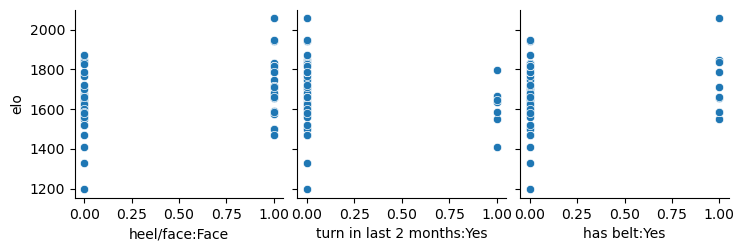

In [6]:
sns.pairplot(new_data, x_vars=['heel/face:Face', 'turn in last 2 months:Yes', 'has belt:Yes'], y_vars=['elo'])

# Does country matter?

By the looks of it, not really (or not enough data for particular countries to say)

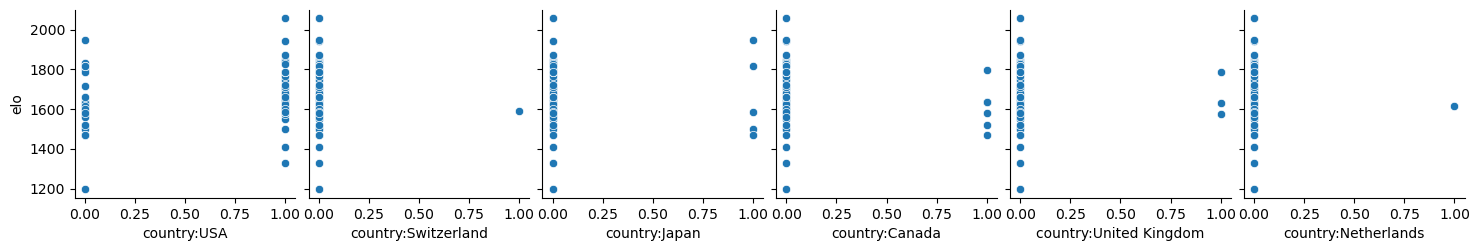

In [7]:
sns.pairplot(new_data, x_vars=['country:USA', 'country:Switzerland', 'country:Japan',
       'country:Canada', 'country:United Kingdom', 'country:Netherlands'], y_vars=['elo'])

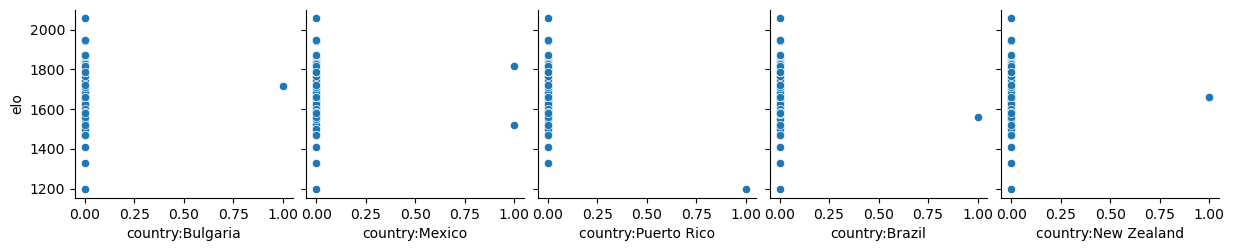

In [8]:
sns.pairplot(new_data, x_vars=['country:Bulgaria', 'country:Mexico', 'country:Puerto Rico',
       'country:Brazil', 'country:New Zealand'], y_vars=['elo'])

# Looking at other stats

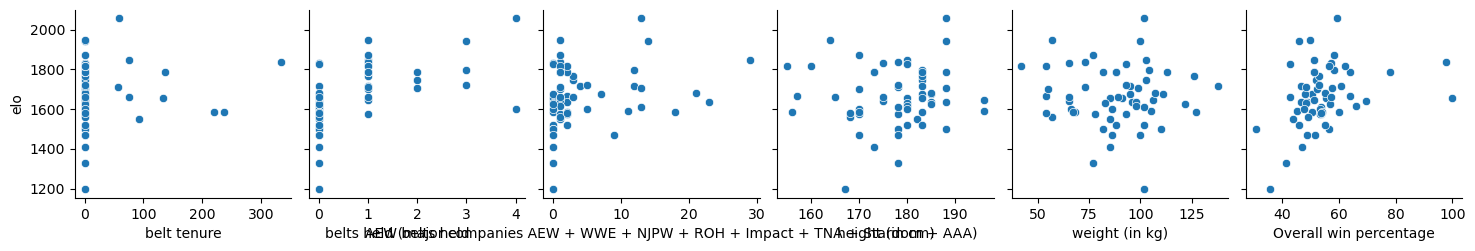

In [9]:
sns.pairplot(new_data, x_vars=['belt tenure', 'AEW belts held',
   'belts held (major companies AEW + WWE + NJPW + ROH + Impact + TNA + Stardom + AAA)',
   'height (in cm)', 'weight (in kg)', 'Overall win percentage'], y_vars=['elo'])

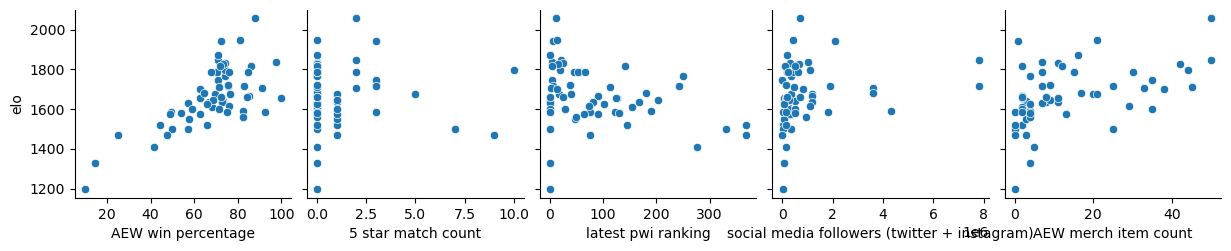

In [10]:
sns.pairplot(new_data, x_vars=['AEW win percentage', '5 star match count', 'latest pwi ranking',
   'social media followers (twitter + instagram)', 'AEW merch item count'], y_vars=['elo'])

# Let's see how the various stats compare

## Heel or Face

Y-intercept is 1621.8846153846152
Slope is 0.0
MSE is 147.2776799997496
R squard value is 0.0780001717070059


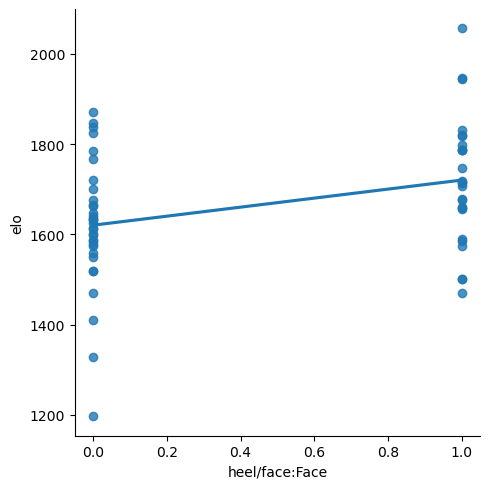

In [11]:
features = ['heel/face:Face']
predicted = 'elo'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)

max_deg = 1
for deg in range(1, max_deg+1):
    poly = PolynomialFeatures(degree=deg)
    XTrans = poly.fit_transform(XTrain)
    linearModel = LinearRegression()
    linearModel.fit(XTrans, YTrain)

    print('Y-intercept is',linearModel.intercept_)
    print('Slope is',linearModel.coef_[0])
    print("MSE is", np.sqrt(mean_squared_error(linearModel.predict(XTrans), YTrain)))
    print("R squard value is", linearModel.score(XTrans, YTrain))
    sns.lmplot(x=features[0], y=predicted, data=new_data[features + ['elo']].astype('float64'), order=deg, ci=0)
    plt.show()

## Number of belts held by a wrestler

Y-intercept is 1604.928813559322
Slope is 0.0
MSE is 128.2124511743464
R squard value is 0.3012571485228396


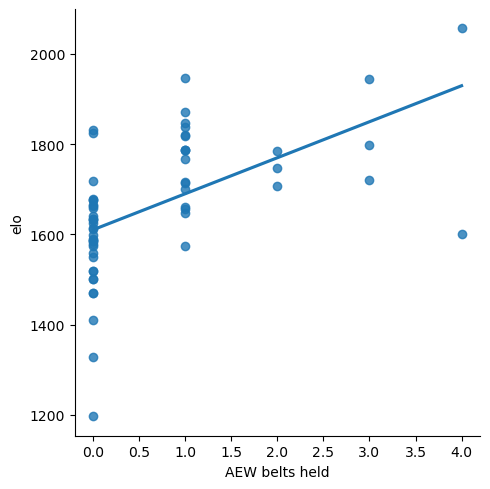

Y-intercept is 1581.8635867282653
Slope is 0.0
MSE is 120.21142505588995
R squard value is 0.3857453360601678


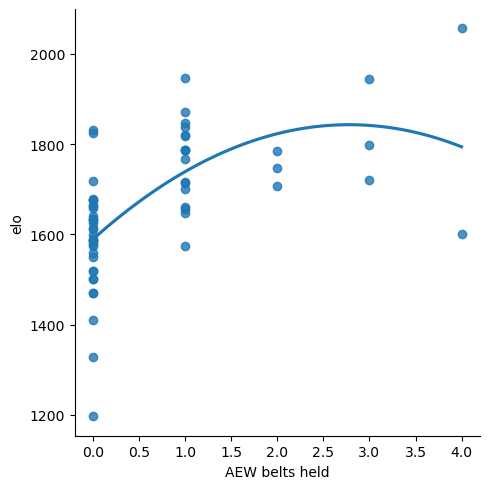

In [12]:
features = ['AEW belts held']
predicted = 'elo'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)

max_deg = 2
for deg in range(1, max_deg+1):
    poly = PolynomialFeatures(degree=deg)
    XTrans = poly.fit_transform(XTrain)
    linearModel = LinearRegression()
    linearModel.fit(XTrans, YTrain)

    print('Y-intercept is',linearModel.intercept_)
    print('Slope is',linearModel.coef_[0])
    print("MSE is", np.sqrt(mean_squared_error(linearModel.predict(XTrans), YTrain)))
    print("R squard value is", linearModel.score(XTrans, YTrain))
    sns.lmplot(x=features[0], y=predicted, data=new_data[features + ['elo']].astype('float64'), order=deg, ci=0)
    plt.show()

## Number of social media followers

Y-intercept is 1639.9463151775055
Slope is 0.0
MSE is 149.01638725526044
R squard value is 0.05610207377891918


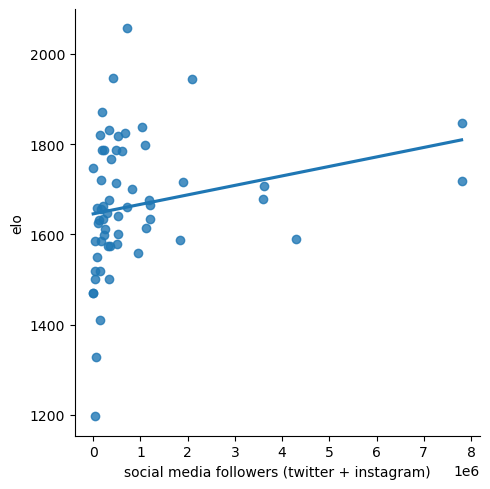

Y-intercept is 1621.8026550168051
Slope is 0.0
MSE is 147.01186011388396
R squard value is 0.08132538314019822


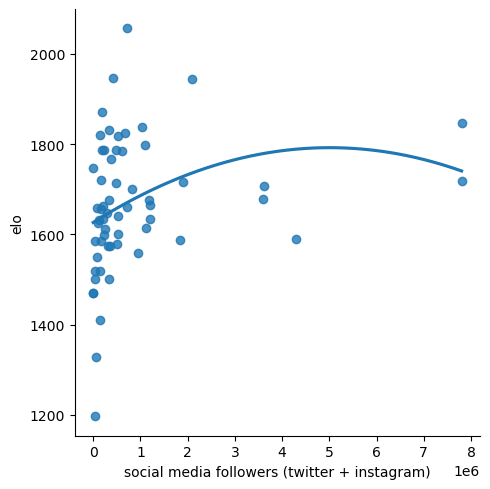

Y-intercept is 1562.9933039331383
Slope is 0.0
MSE is 135.9072399196911
R squard value is 0.21486894289810587


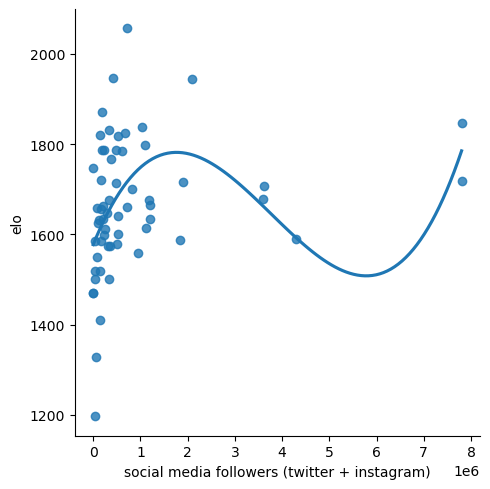

Y-intercept is 1625.076656959715
Slope is 0.0
MSE is 143.34262487612912
R squard value is 0.12661108113790975


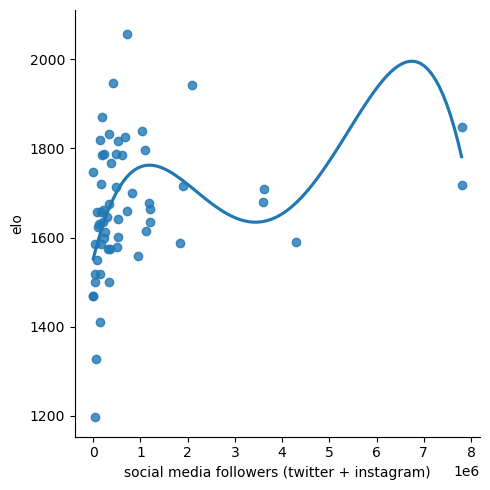

Y-intercept is 1654.6329428164802
Slope is 0.0
MSE is 151.22997326104937
R squard value is 0.027851249497659603


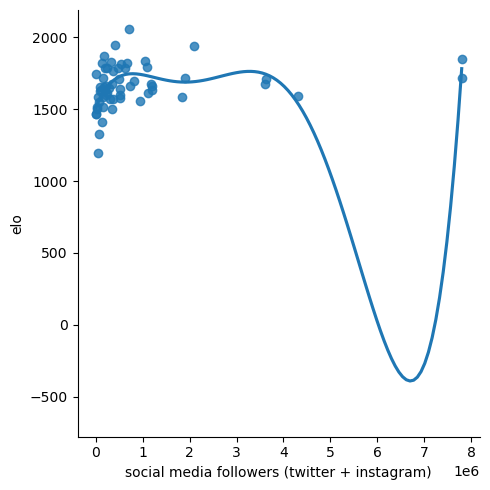

Y-intercept is 1655.3649460495812
Slope is 0.0
MSE is 151.20982331353352
R squard value is 0.02811029128509479


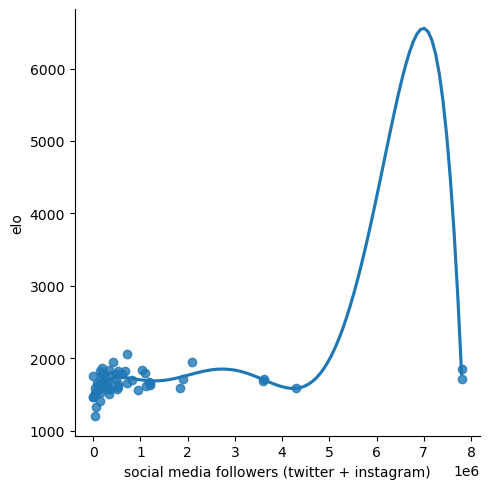

Y-intercept is 1655.7974603833477
Slope is 0.0
MSE is 151.17402310535138
R squard value is 0.028570443069809714


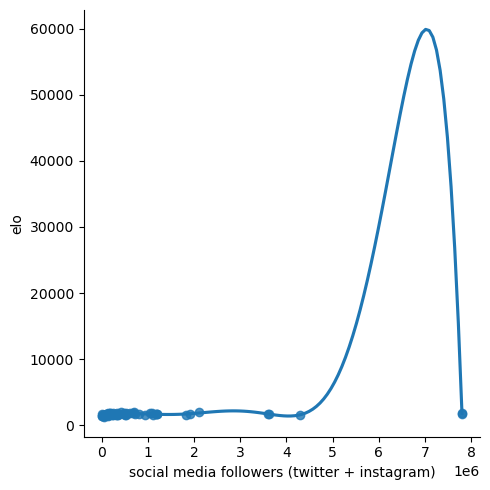

Y-intercept is 1656.0678973620147
Slope is 0.0
MSE is 151.13718952110113
R squard value is 0.029043763454368432


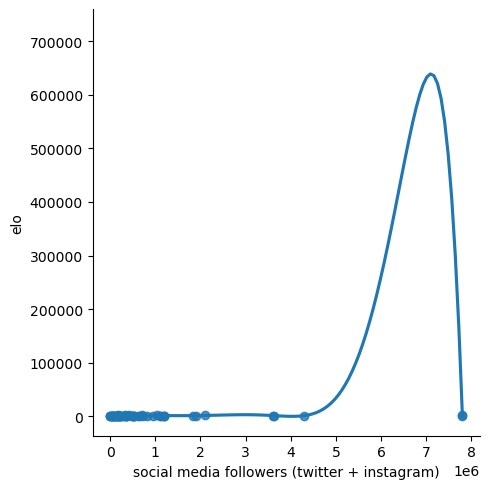

Y-intercept is 1656.2403607694162
Slope is 0.0
MSE is 151.10332141648908
R squard value is 0.029478874931353705


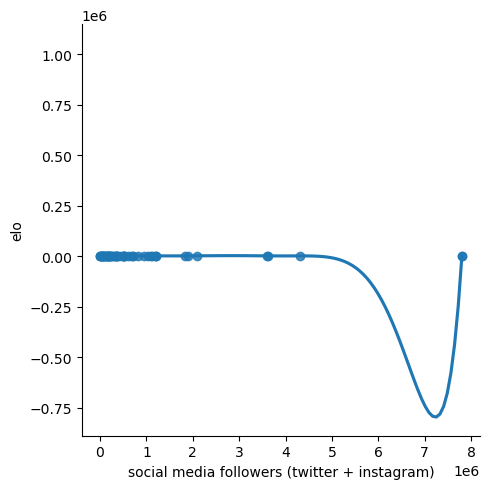

Y-intercept is 1656.3501233218722
Slope is 0.0
MSE is 151.07332377047877
R squard value is 0.02986418028443527


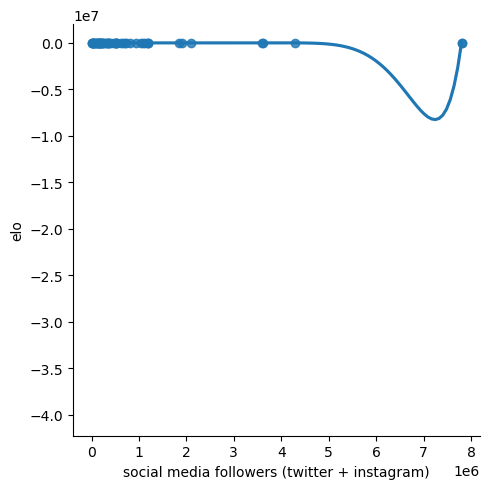

In [13]:
features = ['social media followers (twitter + instagram)']
predicted = 'elo'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)

max_deg = 10
for deg in range(1, max_deg+1):
    poly = PolynomialFeatures(degree=deg)
    XTrans = poly.fit_transform(XTrain)
    linearModel = LinearRegression()
    linearModel.fit(XTrans, YTrain)

    print('Y-intercept is',linearModel.intercept_)
    print('Slope is',linearModel.coef_[0])
    print("MSE is", np.sqrt(mean_squared_error(linearModel.predict(XTrans), YTrain)))
    print("R squard value is", linearModel.score(XTrans, YTrain))
    sns.lmplot(x=features[0], y=predicted, data=new_data[features + ['elo']].astype('float64'), order=deg, ci=0)
    plt.show()

## Does the wrestler currently have a belt?

Y-intercept is 1646.075
Slope is 0.0
MSE is 149.51891875902965
R squard value is 0.049725080423709156


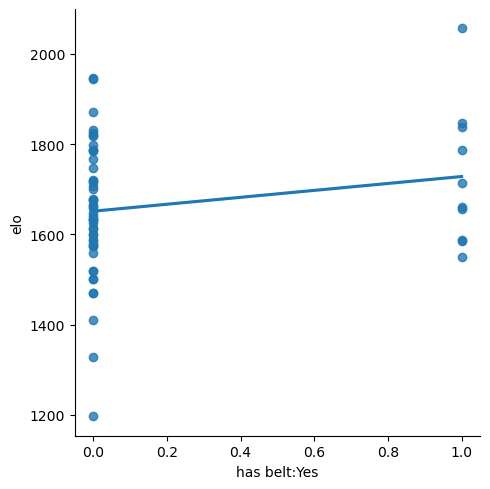

In [16]:
features = ['has belt:Yes']
predicted = 'elo'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)

max_deg = 1
for deg in range(1, max_deg+1):
    poly = PolynomialFeatures(degree=deg)
    XTrans = poly.fit_transform(XTrain)
    linearModel = LinearRegression()
    linearModel.fit(XTrans, YTrain)

    print('Y-intercept is',linearModel.intercept_)
    print('Slope is',linearModel.coef_[0])
    print("MSE is", np.sqrt(mean_squared_error(linearModel.predict(XTrans), YTrain)))
    print("R squard value is", linearModel.score(XTrans, YTrain))
    sns.lmplot(x=features[0], y=predicted, data=new_data[features + ['elo']].astype('float64'), order=deg, ci=0)
    plt.show()

## Height in cm

Y-intercept is 1319.4171647609148
Slope is 0.0
MSE is 152.37514895544757
R squard value is 0.013072482986148937


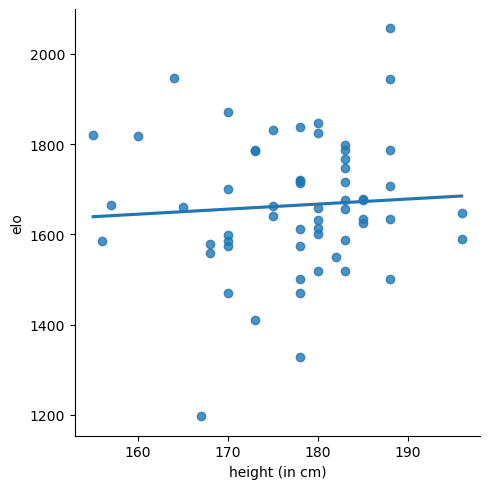

In [20]:
features = ['height (in cm)']
predicted = 'elo'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)

max_deg = 1
for deg in range(1, max_deg+1):
    poly = PolynomialFeatures(degree=deg)
    XTrans = poly.fit_transform(XTrain)
    linearModel = LinearRegression()
    linearModel.fit(XTrans, YTrain)

    print('Y-intercept is',linearModel.intercept_)
    print('Slope is',linearModel.coef_[0])
    print("MSE is", np.sqrt(mean_squared_error(linearModel.predict(XTrans), YTrain)))
    print("R squard value is", linearModel.score(XTrans, YTrain))
    sns.lmplot(x=features[0], y=predicted, data=new_data[features + ['elo']].astype('float64'), order=deg, ci=0)
    plt.show()

## Weight in kg 

Y-intercept is 1656.8147964449136
Slope is 0.0
MSE is 153.37898209748533
R squard value is 2.6078620098290983e-05


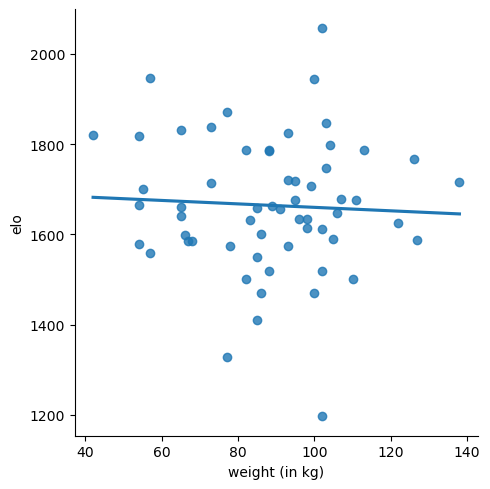

In [21]:
features = ['weight (in kg)']
predicted = 'elo'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)

max_deg = 1
for deg in range(1, max_deg+1):
    poly = PolynomialFeatures(degree=deg)
    XTrans = poly.fit_transform(XTrain)
    linearModel = LinearRegression()
    linearModel.fit(XTrans, YTrain)

    print('Y-intercept is',linearModel.intercept_)
    print('Slope is',linearModel.coef_[0])
    print("MSE is", np.sqrt(mean_squared_error(linearModel.predict(XTrans), YTrain)))
    print("R squard value is", linearModel.score(XTrans, YTrain))
    sns.lmplot(x=features[0], y=predicted, data=new_data[features + ['elo']].astype('float64'), order=deg, ci=0)
    plt.show()

## If they have a belt, tenure with belt

Y-intercept is 1654.95495224889
Slope is 0.0
MSE is 152.67802144736052
R squard value is 0.009145198651085651


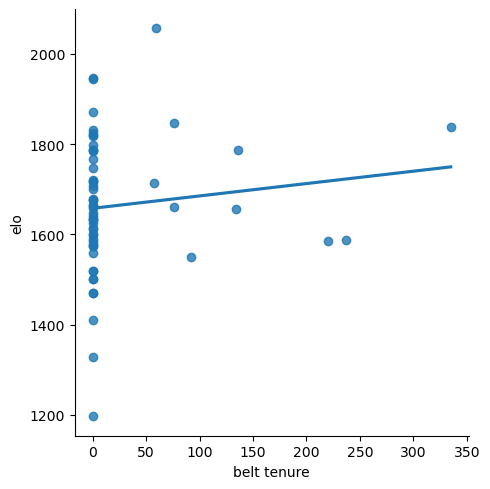

In [22]:
features = ['belt tenure']
predicted = 'elo'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)

max_deg = 1
for deg in range(1, max_deg+1):
    poly = PolynomialFeatures(degree=deg)
    XTrans = poly.fit_transform(XTrain)
    linearModel = LinearRegression()
    linearModel.fit(XTrans, YTrain)

    print('Y-intercept is',linearModel.intercept_)
    print('Slope is',linearModel.coef_[0])
    print("MSE is", np.sqrt(mean_squared_error(linearModel.predict(XTrans), YTrain)))
    print("R squard value is", linearModel.score(XTrans, YTrain))
    sns.lmplot(x=features[0], y=predicted, data=new_data[features + ['elo']].astype('float64'), order=deg, ci=0)
    plt.show()

## Number of items for sale in merch shop

Y-intercept is 1592.5917724398837
Slope is 0.0
MSE is 134.96517272087272
R squard value is 0.22571579279415754


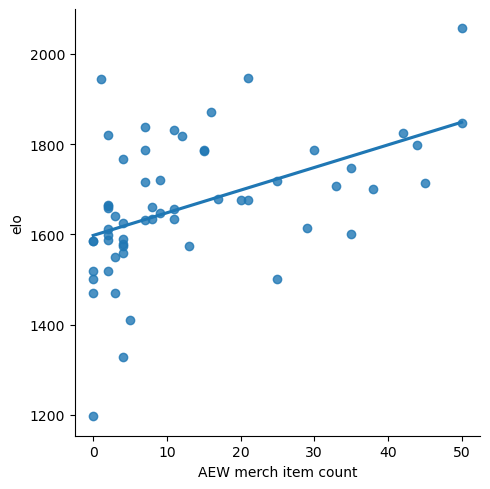

In [24]:
features = ['AEW merch item count']
predicted = 'elo'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)

max_deg = 1
for deg in range(1, max_deg+1):
    poly = PolynomialFeatures(degree=deg)
    XTrans = poly.fit_transform(XTrain)
    linearModel = LinearRegression()
    linearModel.fit(XTrans, YTrain)

    print('Y-intercept is',linearModel.intercept_)
    print('Slope is',linearModel.coef_[0])
    print("MSE is", np.sqrt(mean_squared_error(linearModel.predict(XTrans), YTrain)))
    print("R squard value is", linearModel.score(XTrans, YTrain))
    sns.lmplot(x=features[0], y=predicted, data=new_data[features + ['elo']].astype('float64'), order=deg, ci=0)
    plt.show()

## Number of AEW belts held

Y-intercept is 1604.928813559322
Slope is 0.0
MSE is 128.2124511743464
R squard value is 0.3012571485228396


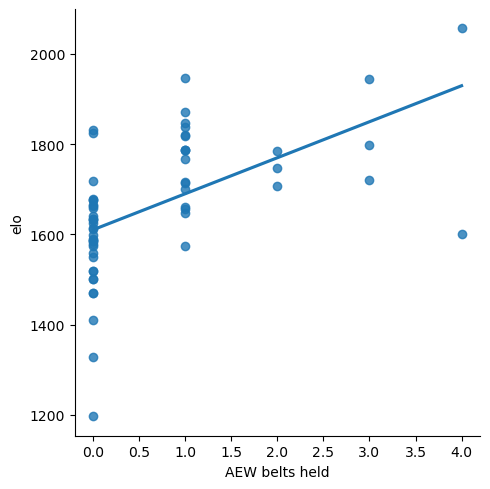

In [26]:
features = ['AEW belts held']
predicted = 'elo'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)

max_deg = 1
for deg in range(1, max_deg+1):
    poly = PolynomialFeatures(degree=deg)
    XTrans = poly.fit_transform(XTrain)
    linearModel = LinearRegression()
    linearModel.fit(XTrans, YTrain)

    print('Y-intercept is',linearModel.intercept_)
    print('Slope is',linearModel.coef_[0])
    print("MSE is", np.sqrt(mean_squared_error(linearModel.predict(XTrans), YTrain)))
    print("R squard value is", linearModel.score(XTrans, YTrain))
    sns.lmplot(x=features[0], y=predicted, data=new_data[features + ['elo']].astype('float64'), order=deg, ci=0)
    plt.show()

## Belts held across major companies

Y-intercept is 1632.3849894291754
Slope is 0.0
MSE is 146.96413891674263
R squard value is 0.08192170424003187


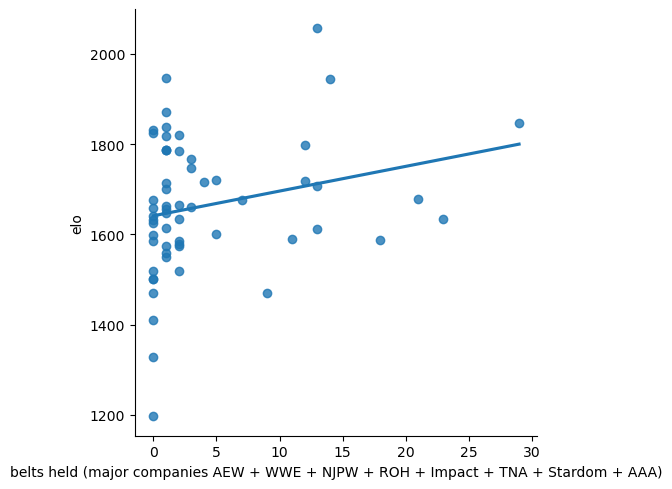

In [27]:
features = ['belts held (major companies AEW + WWE + NJPW + ROH + Impact + TNA + Stardom + AAA)']
predicted = 'elo'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)

max_deg = 1
for deg in range(1, max_deg+1):
    poly = PolynomialFeatures(degree=deg)
    XTrans = poly.fit_transform(XTrain)
    linearModel = LinearRegression()
    linearModel.fit(XTrans, YTrain)

    print('Y-intercept is',linearModel.intercept_)
    print('Slope is',linearModel.coef_[0])
    print("MSE is", np.sqrt(mean_squared_error(linearModel.predict(XTrans), YTrain)))
    print("R squard value is", linearModel.score(XTrans, YTrain))
    sns.lmplot(x=features[0], y=predicted, data=new_data[features + ['elo']].astype('float64'), order=deg, ci=0)
    plt.show()